In [20]:
import pandas as pd
import config
import os
import csv
import sys
from datasets import load_dataset, load_from_disk
from transformers import LongformerTokenizerFast
from tqdm.auto import tqdm
import seaborn as sns
sns.set(style='darkgrid')

In [15]:
data_files = os.path.join('../data/patentsview', 'patents_2019.csv')

In [17]:
dataset = load_dataset('csv', data_files=data_files, cache_dir=os.path.join('../data/patentsview', 'cache'))

Using custom data configuration default-d54856ff809a378b


100%|██████████| 1/1 [00:00<00:00, 417.47it/s]


Dataset csv downloaded and prepared to ../data/patentsview/cache/csv/default-d54856ff809a378b/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


In [24]:
def batch_tokenizer(batch):
    return tokenizer(batch["text"], padding='do_not_pad', truncation=False)

In [25]:
tokenizer = LongformerTokenizerFast.from_pretrained('allenai/longformer-base-4096')
tokenized_data = dataset.map(batch_tokenizer, batched=True, remove_columns=['text'])

100%|██████████| 310/310 [1:30:59<00:00, 17.61s/ba]


In [26]:
tokenized_data.save_to_disk(os.path.join('../data/patentsview', "tokenized/nopad_notrim_patents_2019_tokenized"))

In [3]:
tokenized_data = load_from_disk(os.path.join('../data/patentsview', "tokenized/nopad_notrim_patents_2019_tokenized"))

In [14]:
progress_bar = tqdm(range(len(tokenized_data['train'])))

  1%|          | 2598/310000 [00:53<1:45:25, 48.59it/s]


In [15]:
df = pd.DataFrame(columns=['num_tokens','label'])
for i, patent in enumerate(tokenized_data['train']):
    df.loc[i] = [len(patent['input_ids']), config.id2label[patent['label']]]
    progress_bar.update(1)

df.to_csv("../data/patentsview/meta/patents_2019_num_tokens_and_label.csv", index=False)
ddf= pd.read_csv("../data/patentsview/meta/patents_2019_num_tokens_and_label.csv")
ddf

100%|█████████▉| 309998/310000 [1:45:43<00:00, 31.42it/s]  

,num_tokens,label
0,579,A
1,8170,G
2,2184,A
3,3068,A
4,14379,A
...,...,...
309995,18198,A
309996,3069,G
309997,7044,G
309998,31109,G


In [46]:
print(ddf.describe())

          num_tokens
count  310000.000000
mean    11487.254961
std     17196.713500
min        34.000000
25%      4425.750000
50%      7654.000000
75%     12911.000000
max    886819.000000


In [17]:
ddf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310000 entries, 0 to 309999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   num_tokens  310000 non-null  int64 
 1   label       310000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


100%|██████████| 310000/310000 [1:45:57<00:00, 31.42it/s]

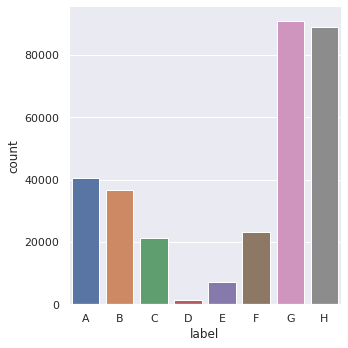

In [30]:
# Label count distribution
sns.catplot(data=ddf, x="label", kind="count", order=config.labels_list)

In [28]:
# Mean token length of labels
for label in config.labels_list:
    mean = round(ddf[ddf['label']== label]['num_tokens'].mean()) 
    print("Mean token length of label {} is {}".format(label, mean))

Mean token length of label A is 14558
Mean token length of label B is 7624
Mean token length of label C is 23219
Mean token length of label D is 8826
Mean token length of label E is 6627
Mean token length of label F is 6509
Mean token length of label G is 11318
Mean token length of label H is 10806


In [45]:
for label in config.labels_list:
    print("Label: {}".format(label))
    print(ddf[ddf['label']== label].describe())
    print("-----------------------------------")

Label: A
          num_tokens
count   40380.000000
mean    14557.523081
std     24551.538353
min        34.000000
25%      4076.000000
50%      7913.500000
75%     15852.750000
max    880936.000000
-----------------------------------
Label: B
          num_tokens
count   36610.000000
mean     7623.975389
std      8563.672966
min        54.000000
25%      3035.250000
50%      5369.500000
75%      9251.750000
max    320991.000000
-----------------------------------
Label: C
          num_tokens
count   21195.000000
mean    23218.574617
std     39272.973034
min        34.000000
25%      5864.000000
50%     11758.000000
75%     24312.500000
max    886819.000000
-----------------------------------
Label: D
          num_tokens
count    1406.000000
mean     8826.067568
std     11321.460105
min       246.000000
25%      3369.000000
50%      5893.000000
75%     10347.250000
max    148121.000000
-----------------------------------
Label: E
          num_tokens
count    7286.000000
mean     6626